<a href="https://colab.research.google.com/github/emes83/TensorFlow-Time-Series-Examples/blob/master/try_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [0]:
df = pd.read_csv('ifoodBR.csv')

In [0]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [0]:
train, test = df[:-12], df[-12:]

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [0]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
3/3 [==============================] - 1s 237ms/step - loss: 0.4459
Epoch 2/90
3/3 [==============================] - 0s 20ms/step - loss: 0.3647
Epoch 3/90
3/3 [==============================] - 0s 33ms/step - loss: 0.3047
Epoch 4/90
3/3 [==============================] - 0s 33ms/step - loss: 0.2296
Epoch 5/90
3/3 [==============================] - 0s 33ms/step - loss: 0.1450
Epoch 6/90
3/3 [==============================] - 0s 36ms/step - loss: 0.0756
Epoch 7/90
3/3 [==============================] - 0s 31ms/step - loss: 0.0121
Epoch 8/90
3/3 [==============================] - 0s 33ms/step - loss: 0.0334
Epoch 9/90
3/3 [==============================] - 0s 33ms/step - loss: 0.0193
Epoch 10/90
3/3 [==============================] - 0s 34ms/step - loss: 0.0156
Epoch 11/90
3/3 [==============================] - 0s 33ms/step - loss: 0.0304
Epoch 12/90
3/3 [==============================] - 0s 34ms/step - loss: 0.0170
Epoch 13/90
3/3 [==============================] - 0s 31ms/s

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

In [32]:
df_test

,Value,Prediction
Month,,
2016-06-01,4821,NaN
2016-07-01,5574,NaN
2016-08-01,2899,NaN
2016-09-01,8241,NaN
2016-10-01,3550,NaN
2016-11-01,6610,NaN
2016-12-01,7870,NaN
2017-01-01,7335,NaN
2017-02-01,12068,NaN


No handles with labels found to put in legend.


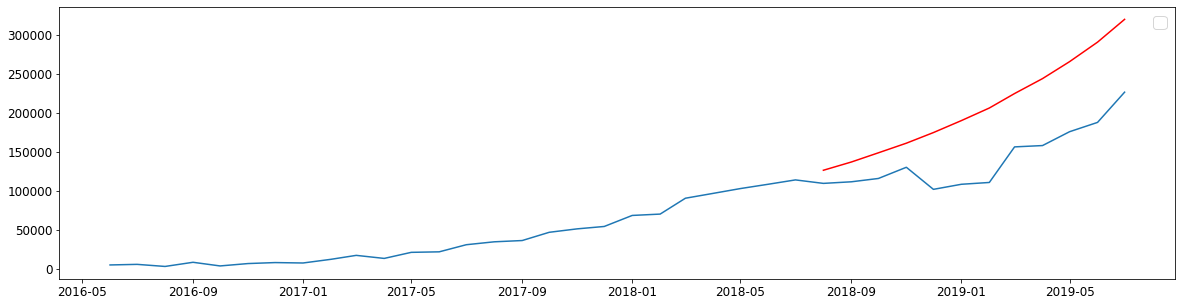

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Value'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [72874.07239474]


In [35]:
df_test.iloc[-n_input:, [0]]

,Value
Month,
2018-08-01,109612
2018-09-01,111655
2018-10-01,115928
2018-11-01,130308
2018-12-01,101947
2019-01-01,108463
2019-02-01,110792
2019-03-01,156504
2019-04-01,158207


In [36]:
df_test.iloc[-n_input:, [1]]

,Prediction
Month,
2018-08-01,126472.944819
2018-09-01,137070.268130
2018-10-01,148902.685158
2018-11-01,161253.754865
2018-12-01,174892.165271
2019-01-01,190272.764650
2019-02-01,206448.984026
2019-03-01,225042.785999
2019-04-01,244238.515077


In [0]:
train = df

In [0]:
scaler.fit(train)
train = scaler.transform(train)

In [0]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [40]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
5/5 [==============================] - 0s 23ms/step - loss: 0.0231
Epoch 2/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0168
Epoch 3/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0140
Epoch 4/90
5/5 [==============================] - 0s 21ms/step - loss: 0.0117
Epoch 5/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0081
Epoch 6/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0143
Epoch 7/90
5/5 [==============================] - 0s 24ms/step - loss: 0.0129
Epoch 8/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0085
Epoch 9/90
5/5 [==============================] - 0s 34ms/step - loss: 0.0108
Epoch 10/90
5/5 [==============================] - 0s 21ms/step - loss: 0.0086
Epoch 11/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0085
Epoch 12/90
5/5 [==============================] - 0s 22ms/step - loss: 0.0066
Epoch 13/90
5/5 [==============================] - 0s 22ms/st

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


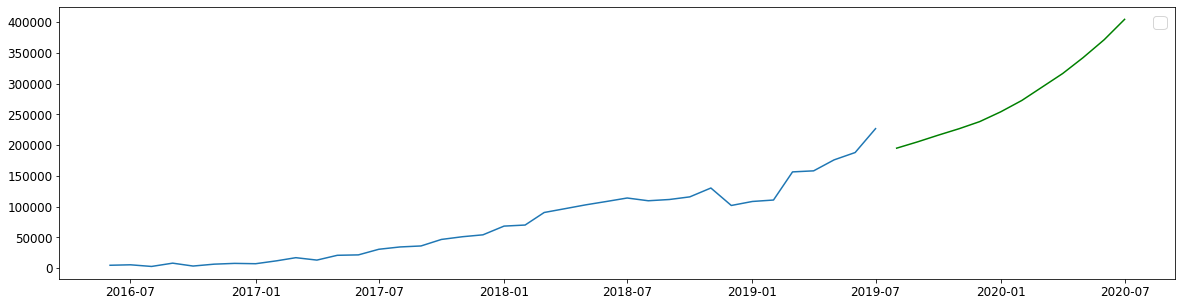

In [44]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Value'])
plt.plot(df_proj.index, df_proj['Prediction'], color='green')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [45]:
df_proj

,Value,Prediction
2016-06-01,4821.0,NaN
2016-07-01,5574.0,NaN
2016-08-01,2899.0,NaN
2016-09-01,8241.0,NaN
2016-10-01,3550.0,NaN
2016-11-01,6610.0,NaN
2016-12-01,7870.0,NaN
2017-01-01,7335.0,NaN
2017-02-01,12068.0,NaN
2017-03-01,17133.0,NaN


In [0]:
dataset=df_proj['Prediction']
dataset.to_csv('predictions.csv')